In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('stds.xlsx')
df = df.rename(columns={'Unnamed: 0': 'год'})

In [3]:
df

,год,Всего по экономике,Производство кокса и нефтепродуктов,Финансовая деятельность,Образование,Инфляция,Прирост ВВП
0,2000,2223.4,4916.3,5232.2,1240.2,18.94,10.0
1,2001,3240.4,7012.4,8885.2,1833.0,22.05,5.1
2,2002,4360.3,9625.3,13245.9,2927.3,15.00,4.7
3,2003,5498.5,11879.0,15561.2,3386.6,13.91,7.3
4,2004,6739.5,13729.3,17383.8,4203.4,10.36,7.2
5,2005,8554.9,19397.1,22463.5,5429.7,13.16,6.4
6,2006,10633.9,22319.6,27885.5,6983.3,9.26,8.2
7,2007,13593.4,28565.0,34879.8,8778.3,8.70,8.5
8,2008,17290.1,34912.5,41871.8,11316.8,14.73,5.2
9,2009,18637.5,37963.7,42372.9,13293.6,12.01,-7.8


In [4]:
df['Прирост % Всего по  экономике'] = df['Всего по  экономике'].pct_change()* 100
df['Прирост % Производство кокса и нефтепродуктов'] = df['Производство кокса и нефтепродуктов'].pct_change()* 100
df['Прирост % Финансовая деятельность'] = df['Финансовая деятельность'].pct_change()* 100
df['Прирост % Образование'] = df['Образование'].pct_change()* 100

df['Реальный прирост % Всего по  экономике'] = df['Всего по  экономике'].pct_change()* 100 - df['Инфляция']
df['Реальный прирост % Производство кокса и нефтепродуктов'] = df['Производство кокса и нефтепродуктов'].pct_change()* 100 - df['Инфляция']
df['Реальный прирост % Финансовая деятельность'] = df['Финансовая деятельность'].pct_change()* 100 - df['Инфляция']
df['Реальный прирост % Образование'] = df['Образование'].pct_change()* 100 - df['Инфляция']

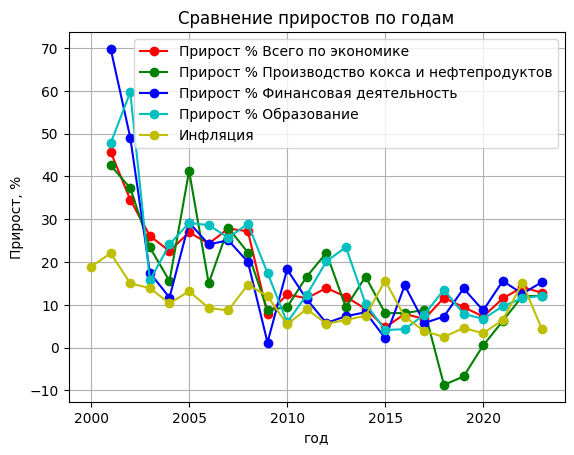

In [5]:
# строим графики для каждой колонки с процентным приростом и задаем каждому свой цвет
plt.plot(df['год'], df['Прирост % Всего по  экономике'], marker='o', color='r', label='Прирост % Всего по экономике')
plt.plot(df['год'], df['Прирост % Производство кокса и нефтепродуктов'], marker='o', color='g', label='Прирост % Производство кокса и нефтепродуктов')
plt.plot(df['год'], df['Прирост % Финансовая деятельность'], marker='o', color='b', label='Прирост % Финансовая деятельность')
plt.plot(df['год'], df['Прирост % Образование'], marker='o', color='c', label='Прирост % Образование')
plt.plot(df['год'], df['Инфляция'], marker='o', color='y', label='Инфляция')



plt.title('Сравнение приростов по годам')
plt.xlabel('год')
plt.ylabel('Прирост, %')
plt.legend()
plt.grid(True)
plt.show()

# **Реальный прирост = Прирост - Инфляция (в рамках одного года)**

**Он ощутимо меньше, и это можно увидеть на графике**

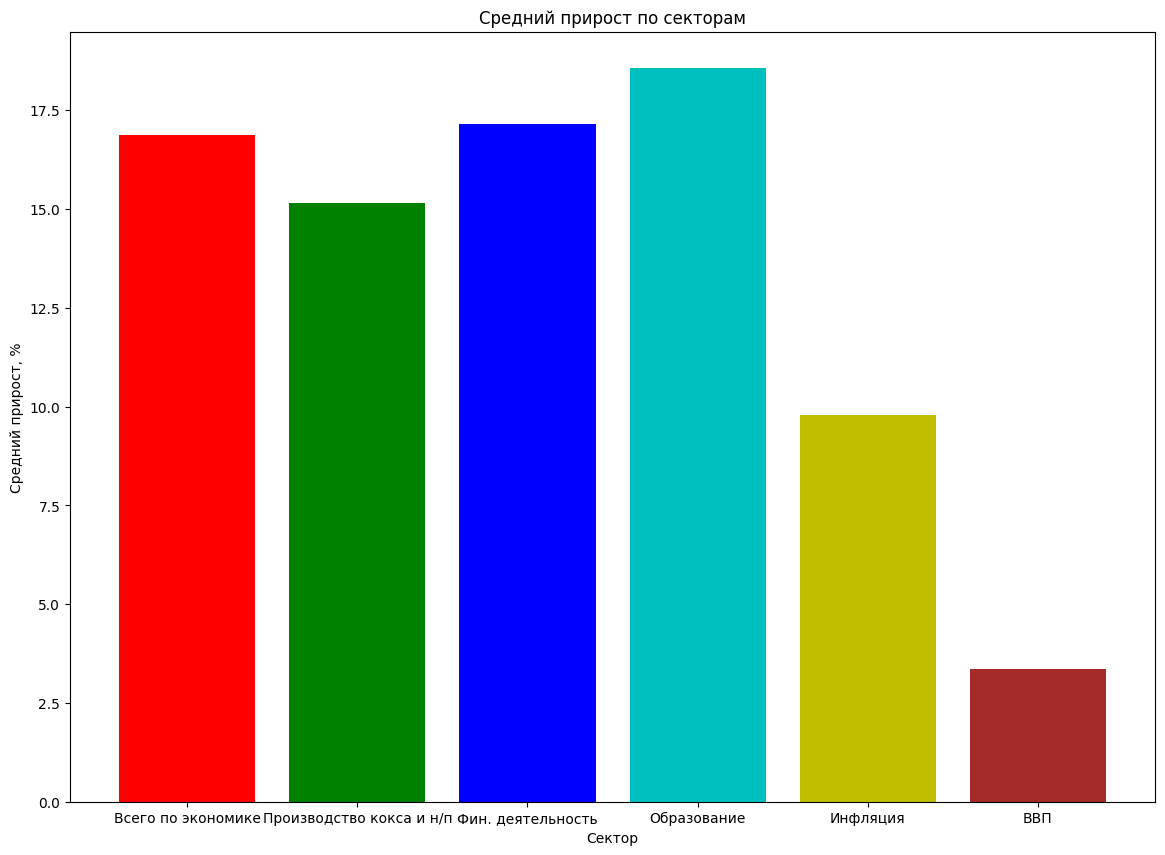

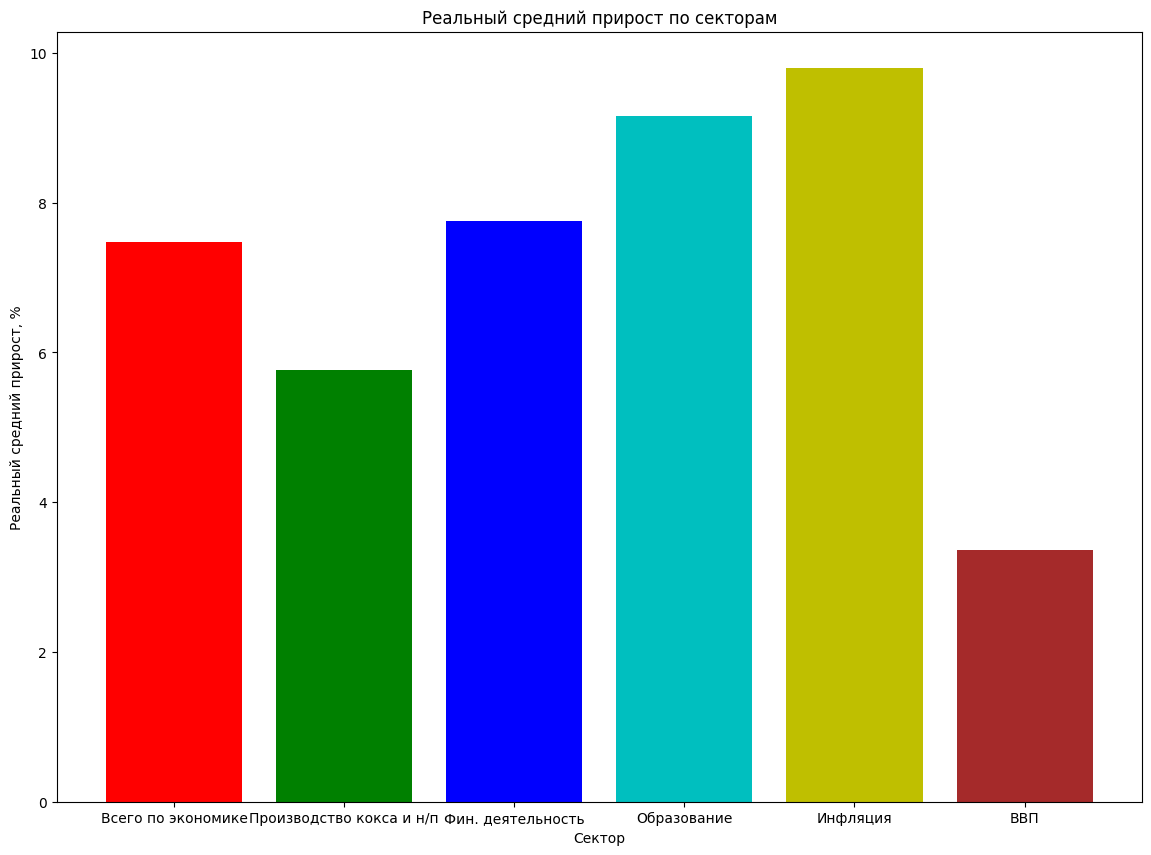

In [6]:
# вычисляем средний прирост по каждой колонке
mean_growth_total = df['Прирост % Всего по  экономике'].mean()
mean_growth_coke = df['Прирост % Производство кокса и нефтепродуктов'].mean()
mean_growth_finance = df['Прирост % Финансовая деятельность'].mean()
mean_growth_education = df['Прирост % Образование'].mean()
mean_inflation = df['Инфляция'].mean()
mean_gdp = df['Прирост ВВП'].mean()

# создаем график для отображения среднего прироста как столбиков
plt.figure(figsize=(14, 10))
plt.bar(['Всего по экономике', 'Производство кокса и н/п', 'Фин. деятельность', 'Образование', 'Инфляция', 'ВВП'],
        [mean_growth_total, mean_growth_coke, mean_growth_finance, mean_growth_education, mean_inflation, mean_gdp],
        color=['r', 'g', 'b', 'c','y', 'brown'])
plt.title('Средний прирост по секторам')
plt.xlabel('Сектор')
plt.ylabel('Средний прирост, %')
plt.show()

# вычисляем средний прирост по каждой колонке
mean_growth_total = (df)['Прирост % Всего по  экономике'].mean()
mean_growth_coke = df['Прирост % Производство кокса и нефтепродуктов'].mean()
mean_growth_finance = df['Прирост % Финансовая деятельность'].mean()
mean_growth_education = df['Прирост % Образование'].mean()
mean_inflation = df['Инфляция'].mean()
mean_gdp = df['Прирост ВВП'].mean()

# вычисляем реальный средний прирост по каждой колонке
mean_growth_total = df['Реальный прирост % Всего по  экономике'].mean()
mean_growth_coke = df['Реальный прирост % Производство кокса и нефтепродуктов'].mean()
mean_growth_finance = df['Реальный прирост % Финансовая деятельность'].mean()
mean_growth_education = df['Реальный прирост % Образование'].mean()
mean_inflation = df['Инфляция'].mean()
mean_gdp = df['Прирост ВВП'].mean()

# создаем график для отображения реального среднего прироста как столбиков
plt.figure(figsize=(14, 10))
plt.bar(['Всего по экономике', 'Производство кокса и н/п', 'Фин. деятельность', 'Образование', 'Инфляция', 'ВВП'],
        [mean_growth_total, mean_growth_coke, mean_growth_finance, mean_growth_education, mean_inflation, mean_gdp],
        color=['r', 'g', 'b', 'c','y', 'brown'])
plt.title('Реальный средний прирост по секторам')
plt.xlabel('Сектор')
plt.ylabel('Реальный средний прирост, %')
plt.show()

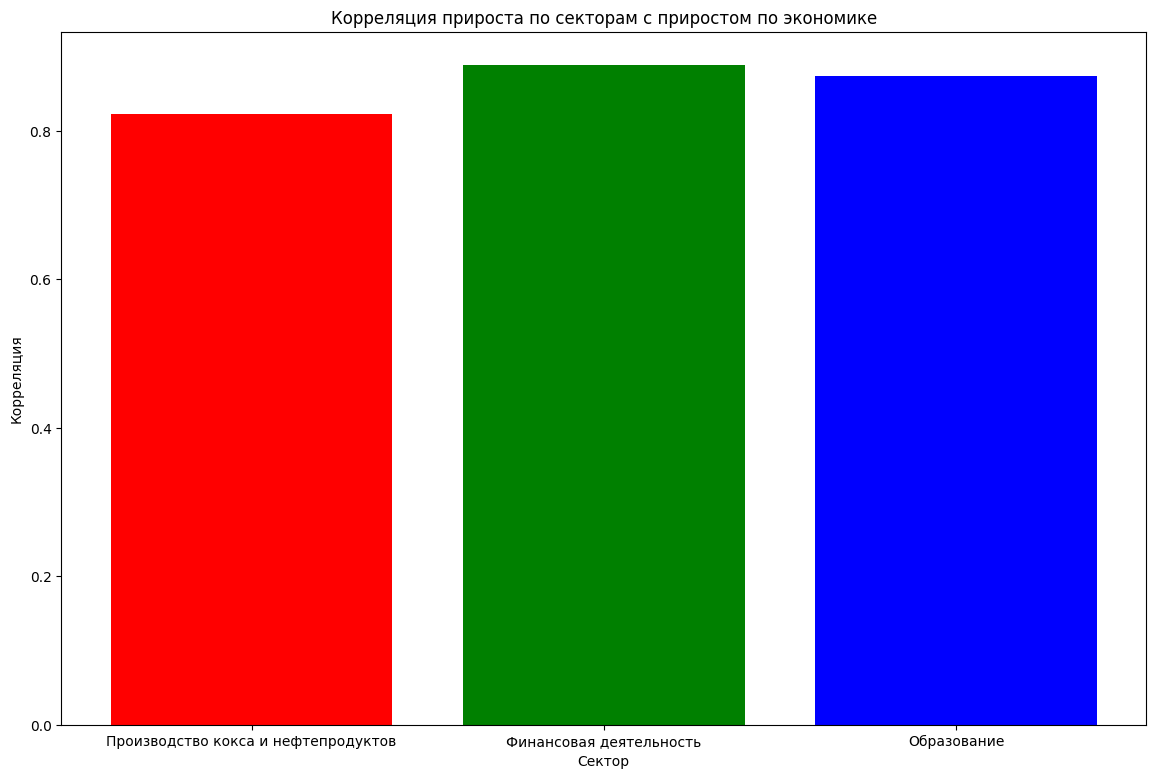

In [7]:
# вычисляем корреляцию прироста по каждому сектору с приростом 'Прирост % Всего по экономике'
correlation_1 = df['Прирост % Всего по  экономике'].corr(df['Прирост % Производство кокса и нефтепродуктов'])
correlation_2 = df['Прирост % Всего по  экономике'].corr(df['Прирост % Финансовая деятельность'])
correlation_3 = df['Прирост % Всего по  экономике'].corr(df['Прирост % Образование'])

# создаем график для отображения корреляции как столбиков
plt.figure(figsize=(14, 9))
plt.bar(['Производство кокса и нефтепродуктов', 'Финансовая деятельность', 'Образование'],
        [correlation_1, correlation_2, correlation_3],
        color=['r', 'g', 'b'])
plt.title('Корреляция прироста по секторам с приростом по экономике')
plt.xlabel('Сектор')
plt.ylabel('Корреляция')
plt.show()

**Пересчет зарплат с учетом инфляции и росту ВВП**



In [8]:
# Создаем новую колонку 'Всего по экономике с учетом инфляции' и устанавливаем начальное значение
df['Всего по экономике с учетом инфляции'] = df.at[0, 'Всего по  экономике']

# Вычисляем зарплату с учетом инфляции для сектора 'Всего по экономике'
for i in range(1, len(df)):
    salary = df.at[0, 'Всего по  экономике']
    for j in range(1, i+1):
        salary *= (1 + (df.at[j, 'Реальный прирост % Всего по  экономике']) / 100)
    df.at[i, 'Всего по экономике с учетом инфляции'] = salary

# Повторяем процесс для каждого сектора
sectors = ['Производство кокса и нефтепродуктов', 'Финансовая деятельность', 'Образование']

for sector in sectors:
    df[f'{sector} с учетом инфляции'] = df.at[0, sector]

    for i in range(1, len(df)):
        salary = df.at[0, sector]
        for j in range(1, i+1):
            salary *= (1 + (df.at[j, f'Реальный прирост % {sector}']) / 100)

        df.at[i, f'{sector} с учетом инфляции'] = salary


##################


# Создаем новую колонку 'Всего по экономике с учетом роста ВВП'
df['Всего по  экономике с учетом роста ВВП'] = df['Всего по  экономике'].copy()

# Пересчитываем среднюю зарплату 'Всего по  экономике' с учетом роста ВВП начиная с 2001 года
for i in range(1, len(df)):
    df.at[i, 'Всего по  экономике с учетом прироста ВВП'] = df.at[i, 'Всего по  экономике'] * (1 + df.at[i, 'Прирост ВВП']/100)

# Пересчитываем среднюю зарплату для сектора 'Производство кокса и нефтепродуктов' с учетом роста ВВП
df['Производство кокса и нефтепродуктов с учетом прироста ВВП'] = df['Производство кокса и нефтепродуктов'].copy()
for i in range(1, len(df)):
    df.at[i, 'Производство кокса и нефтепродуктов с учетом прироста ВВП'] = df.at[i, 'Производство кокса и нефтепродуктов'] * (1 + df.at[i, 'Прирост ВВП']/100)

# Пересчитываем среднюю зарплату для сектора 'Финансовая деятельность' с учетом роста ВВП
df['Финансовая деятельность с роста ВВП'] = df['Финансовая деятельность'].copy()
for i in range(1, len(df)):
    df.at[i, 'Финансовая деятельность с учетом прироста ВВП'] = df.at[i, 'Финансовая деятельность'] * (1 + df.at[i, 'Прирост ВВП']/100)

# Пересчитываем среднюю зарплату для сектора 'Образование' с учетом роста ВВП
df['Образование с учетом роста прироста ВВП'] = df['Образование'].copy()
for i in range(1, len(df)):
    df.at[i, 'Образование с учетом прироста ВВП'] = df.at[i, 'Образование'] * (1 + df.at[i, 'Прирост ВВП']/100)

# Реальный рост ЗП везде гораздо меньше

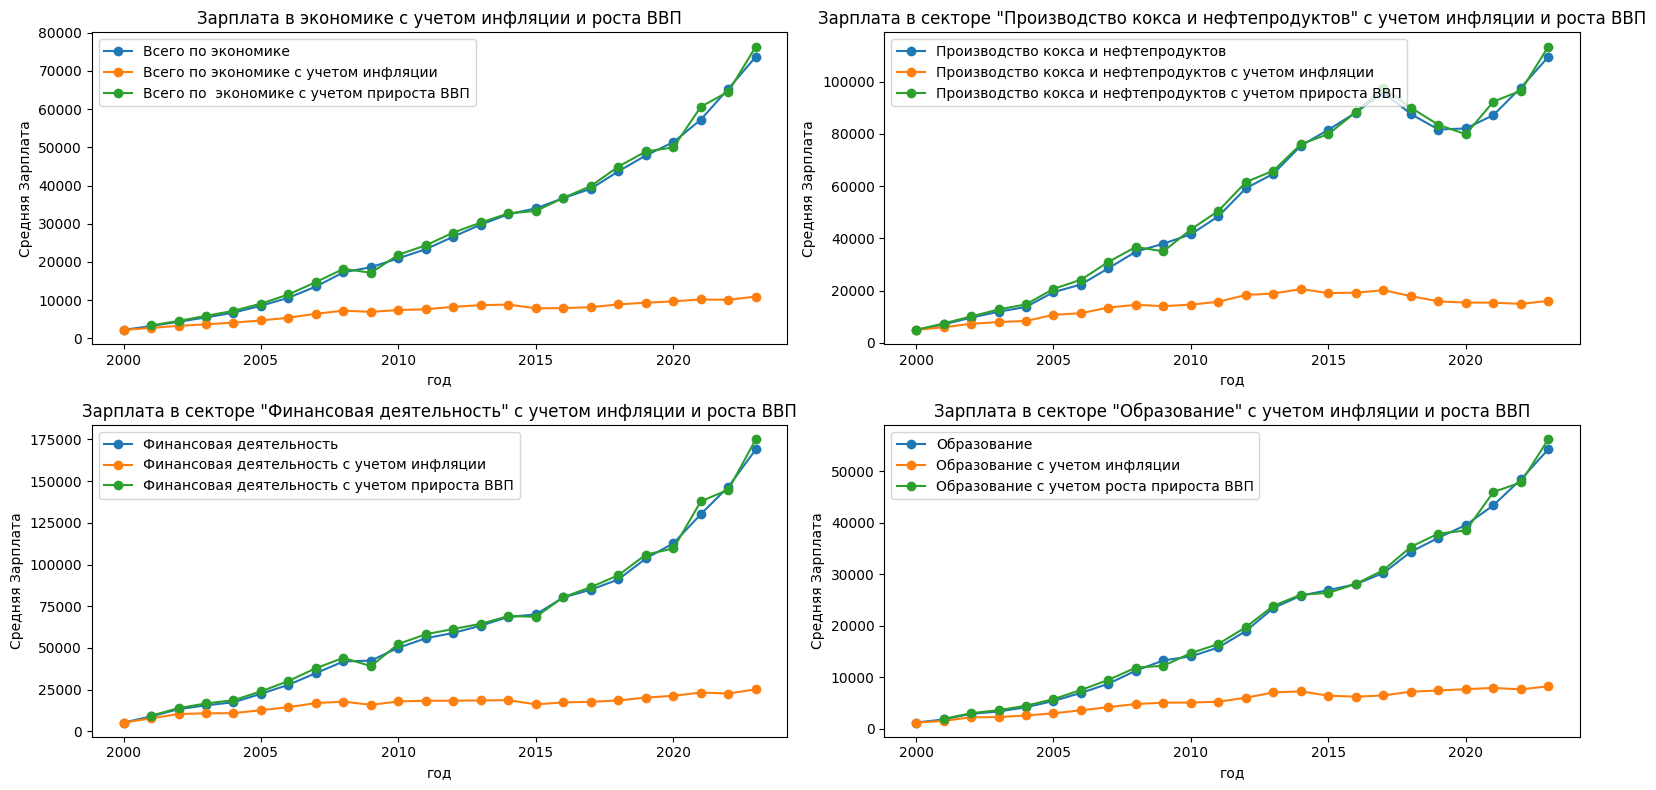

In [9]:
plt.figure(figsize=(16, 8))

# График для 'Всего по экономике' и 'Всего по экономике с учетом инфляции'
plt.subplot(221)
plt.plot(df['год'], df['Всего по  экономике'], marker='o', label='Всего по экономике')
plt.plot(df['год'], df['Всего по экономике с учетом инфляции'], marker='o', label='Всего по экономике с учетом инфляции')
plt.plot(df['год'], df['Всего по  экономике с учетом прироста ВВП'], marker='o', label='Всего по  экономике с учетом прироста ВВП')
plt.title('Зарплата в экономике с учетом инфляции и роста ВВП')
plt.xlabel('год')
plt.ylabel('Средняя Зарплата')
plt.legend()

# График для 'Производство кокса и нефтепродуктов' и 'Производство кокса и нефтепродуктов с учетом инфляции'
plt.subplot(222)
plt.plot(df['год'], df['Производство кокса и нефтепродуктов'], marker='o', label='Производство кокса и нефтепродуктов')
plt.plot(df['год'], df['Производство кокса и нефтепродуктов с учетом инфляции'], marker='o', label='Производство кокса и нефтепродуктов с учетом инфляции')
plt.plot(df['год'], df['Производство кокса и нефтепродуктов с учетом прироста ВВП'], marker='o', label='Производство кокса и нефтепродуктов с учетом прироста ВВП')
plt.title('Зарплата в секторе "Производство кокса и нефтепродуктов" с учетом инфляции и роста ВВП')
plt.xlabel('год')
plt.ylabel('Средняя Зарплата')
plt.legend()

# График для 'Финансовая деятельность' и 'Финансовая деятельность с учетом инфляции'
plt.subplot(223)
plt.plot(df['год'], df['Финансовая деятельность'], marker='o', label='Финансовая деятельность')
plt.plot(df['год'], df['Финансовая деятельность с учетом инфляции'], marker='o', label='Финансовая деятельность с учетом инфляции')
plt.plot(df['год'], df['Финансовая деятельность с учетом прироста ВВП'], marker='o', label='Финансовая деятельность с учетом прироста ВВП')

plt.title('Зарплата в секторе "Финансовая деятельность" с учетом инфляции и роста ВВП')
plt.xlabel('год')
plt.ylabel('Средняя Зарплата')
plt.legend()

# График для 'Образование' и 'Образование с учетом инфляции'
plt.subplot(224)
plt.plot(df['год'], df['Образование'], marker='o', label='Образование')
plt.plot(df['год'], df['Образование с учетом инфляции'], marker='o', label='Образование с учетом инфляции')
plt.plot(df['год'], df['Образование с учетом прироста ВВП'], marker='o', label='Образование с учетом роста прироста ВВП')
plt.title('Зарплата в секторе "Образование" с учетом инфляции и роста ВВП')
plt.xlabel('год')
plt.ylabel('Средняя Зарплата')
plt.legend()

plt.tight_layout()
plt.show()

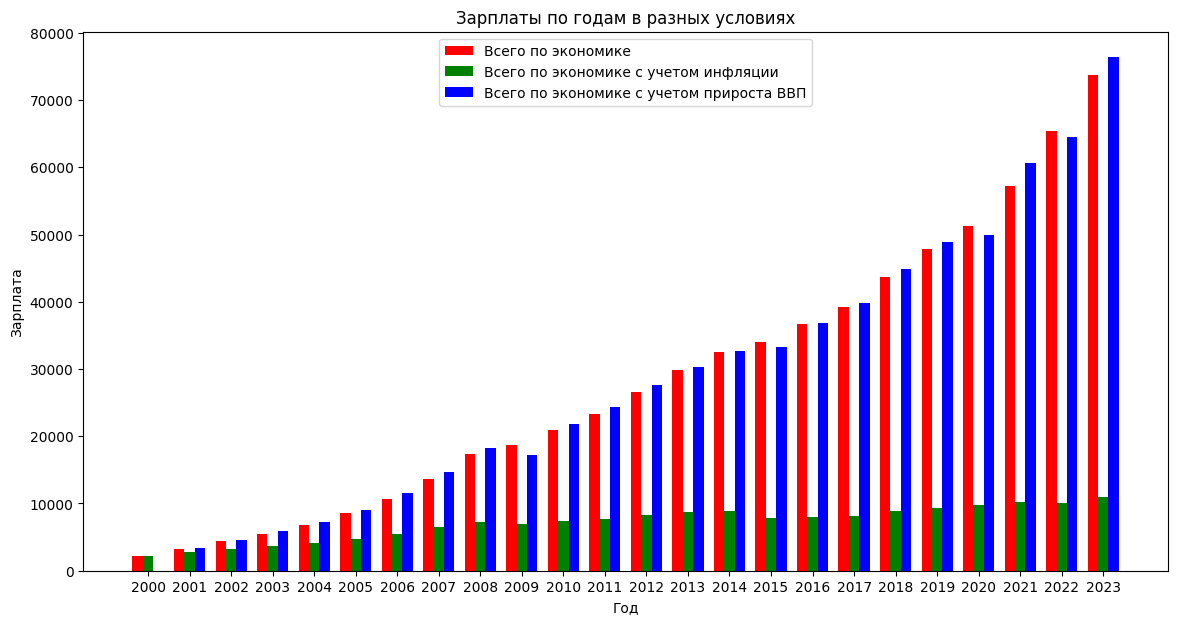

In [10]:
# создаем график для отображения зарплат по годам

import numpy as np

years = df['год'].unique()
salaries_total = df['Всего по  экономике']
salaries_inflation = df['Всего по экономике с учетом инфляции']
salaries_gdp_growth = df['Всего по  экономике с учетом прироста ВВП']

plt.figure(figsize=(14, 7))
bar_width = 0.25
bar_positions_total = np.arange(len(years))
bar_positions_inflation = bar_positions_total + bar_width
bar_positions_growth = bar_positions_inflation + bar_width

plt.bar(bar_positions_total, salaries_total, bar_width, label='Всего по экономике', color='r')
plt.bar(bar_positions_inflation, salaries_inflation, bar_width, label='Всего по экономике с учетом инфляции', color='g')
plt.bar(bar_positions_growth, salaries_gdp_growth, bar_width, label='Всего по экономике с учетом прироста ВВП', color='b')

plt.xlabel('Год')
plt.ylabel('Зарплата')
plt.title('Зарплаты по годам в разных условиях')
plt.xticks(bar_positions_inflation, years)
plt.legend()
plt.show()

# **Вывод**

Рост реальных зарплат хоть и соответству росту ВВП, но с учетом инфляции не такой большой

# **РАБОТА СО СТРИМЛИТОМ**

In [11]:
pip install streamlit

In [12]:
%%writefile StartDS.py

Overwriting StartDS.py


In [13]:
! wget -q -O - ipv4.icanhazip.com

35.234.46.11


In [ ]:
! streamlit run StartDS.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.234.46.11:8501

npx: installed 22 in 3.585s
your url is: https://common-trains-grab.loca.lt
2024-04-14 17:47:51.835 
════════════════════════════════════════════════
deprecation.showPyplotGlobalUse IS DEPRECATED.
The support for global pyplot instances is planned to be removed soon.

This option will be removed on or after 2024-04-15.

Please update <user defined>.
════════════════════════════════════════════════

2024-04-14 17:47:53.971 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, i